In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.ndimage import correlate
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale,resize

(64, 64)


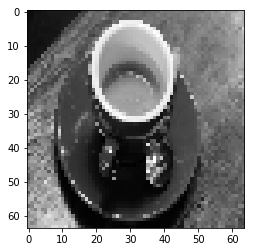

In [4]:
im = rgb2gray(data.coffee())
im = resize(im, (64,64))
print(im.shape)

plt.axis('off') # 축 제거
plt.imshow(im, cmap = 'gray')

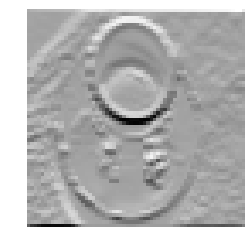

In [17]:
filter1 = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, 'constant')

# 책처럼 음수 인덱스가 되면 (e.g. im_pad[-1, -1]) 반대쪽 모서리 원소가 곱해져서 제대로 convolution이 안 될 거 같은데?
# 아래는 내가 수정함.
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        new_image[i,j] = \
            im_pad[i,j] * filter1[0,0] + \
            im_pad[i,j+1] * filter1[0,1] + \
            im_pad[i,j+2] * filter1[0,2] + \
            im_pad[i+1,j] * filter1[1,0] + \
            im_pad[i+1,j+1] * filter1[1,1] + \
            im_pad[i+1,j+2] * filter1[1,2] +\
            im_pad[i+2,j] * filter1[2,0] + \
            im_pad[i+2,j+1] * filter1[2,1] + \
            im_pad[i+2,j+2] * filter1[2,2]

plt.axis('off')
plt.imshow(new_image, cmap='Greys')